In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import re
# Ping the website and grab all the data available on the link
link = 'https://www.coursera.org/collections/popular-free-courses'
get_website = requests.get(link, timeout=1000)
content = BeautifulSoup(get_website.content)
print(content.prettify())

Store data in lists

In the next step, we will can right click on four objects that we will retrieve from this HTML content i.e. course name, rating, course provider and number of reviews for each course. 

If you are using Google Chrome or Microsoft Edge, you can right click on the name of the first course - "The Science of Well Being" and select "Inspect". You will notice that a window opens on the right with HTML code for this webpage. Here, we find the class that will be used for looping through the available information and help us gather the name of the course. In this case, the class name is 'horizontal-box' under 'div' (indicates a division, or area, of the page). Next, we select the class name that represents the name of the course - 'headline-3-text item-name font-weight-bold' under 'h2' (heading with size 2). 

Similarly, right click on ratings, course provider name and reviews and select Inspect to retrieve the correct classes for those metrics. Using the for loop , we will gather the data for each of the object and save it in an individual list. 

In [164]:
# Loop to go through each row of free courses and store data in lists
course_names = []
course_rating = []
course_provider = []
num_reviews = []

for i in content.find_all('div', class_='horizontal-box'):
    course = i.find_all('h4', class_='headline-3-text item-name font-weight-bold')
    rating = i.find_all('span', class_='ratings-text')
    provider = i.find_all('span')
    reviews = i.find_all('span', class_='ratings-count')
    if course != []:
        course_names.append(course[0].text.split('\n')[0])
        course_rating.append(rating[0].text.split('\n')[0])
        course_provider.append(provider[0].text.split('\n')[0])
        num_reviews.append(reviews[0].text.split('\n')[0])

Create DataFrame

After retrieving the data from the HTML page and saving them into lists, we will create a dataframe 'course_df' that will be used to compile the data in an intelligent manner and can be further used for analysis.

In [165]:
# Store data in a dataframe
course_df = pd.DataFrame()
course_df['Name'] = course_names
course_df['Rating'] = course_rating
course_df['Reviews'] = num_reviews
course_df['Course Provider'] = course_provider
course_df

,Name,Rating,Reviews,Course Provider
0,The Science of Well-Being,4.9,"(27,934)",Yale University
1,Learning How to Learn: Powerful mental tools t...,4.8,"(73,232)","McMaster University, University of California ..."
2,Financial Markets,4.8,"(17,410)",Yale University
3,Machine Learning,4.9,"(158,568)",Stanford University
4,COVID-19 Contact Tracing,4.9,"(81,898)",Johns Hopkins University
5,Successful Negotiation: Essential Strategies a...,4.8,"(13,965)",University of Michigan
6,English for Career Development,4.8,"(9,589)",University of Pennsylvania
7,Financial Engineering and Risk Management Part I,4.6,"(2,277)",Columbia University
8,"Algorithms, Part I",4.9,"(8,510)",Princeton University
9,Seeing Through Photographs,4.8,"(3,823)",The Museum of Modern Art


Data Analysis

After storing the data of all the required metrics in a dataframe, we will begin analyzing it to answer questions such as 
1) Which University provided most number of popular free courses?
2) How to rank the courses by the number of reviews received?
3) How to rank the courses by their average rating?

Answer 1 

To answer the first question, we will count and sort the name of course providers/universities to check which one provided the most number of popular free courses. The answer is Princeton University - 6 courses. (i.e. 25% of all popular free courses)!

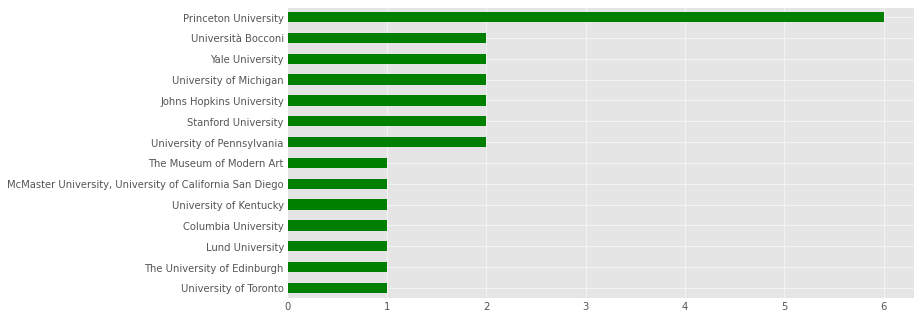

In [166]:
#Which University provided most number of popular free courses?
fig= plt.figure(figsize=(10,5))
course_df['Course Provider'].value_counts().sort_values(ascending=True).plot(kind='barh', color='green')
plt.show()

Answer 2 

To answer the second question, we have to convert the ratings from string type to integer type while removing parenthesis and commas. Once the reviews are in integer type, we will sort the dataframe to understand which course has the highest number of reviews. The answer is Machine Learning Course with 158,568 reviews.

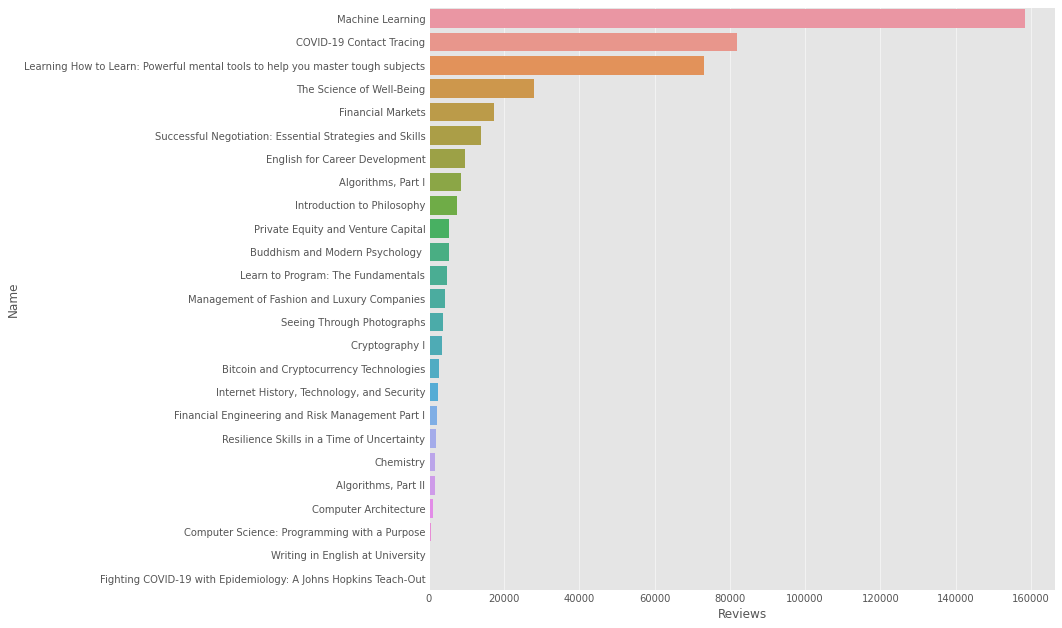

In [167]:
#Rank the courses by the number of reviews
import seaborn as sns
plt.style.use('ggplot')
fig= plt.figure(figsize=(10,10))
course_df['Reviews'] = [(str(i).replace(",", "")) for i in course_df['Reviews']]
course_df['Reviews'] = [(str(i).replace(")", "")) for i in course_df['Reviews']]
course_df['Reviews'] = [(str(i).replace("(", "")) for i in course_df['Reviews']]
course_df['Reviews'] = course_df['Reviews'].astype(int)
course_df.sort_values(by=['Reviews'], inplace=True, ascending = False)
sns.barplot(x='Reviews' , y='Name', data=course_df)
plt.show()

Answer 3 

To answer the final question, we will convert the ratings from string type to float type and sort the dataframe in descending order. The bar plot created after sorting will help us understand the courses and their ratings. As it turns out, there are 6 courses that have an incredible rating of 4.9! Other courses are not doing bad either with the average rating being above 4.5!

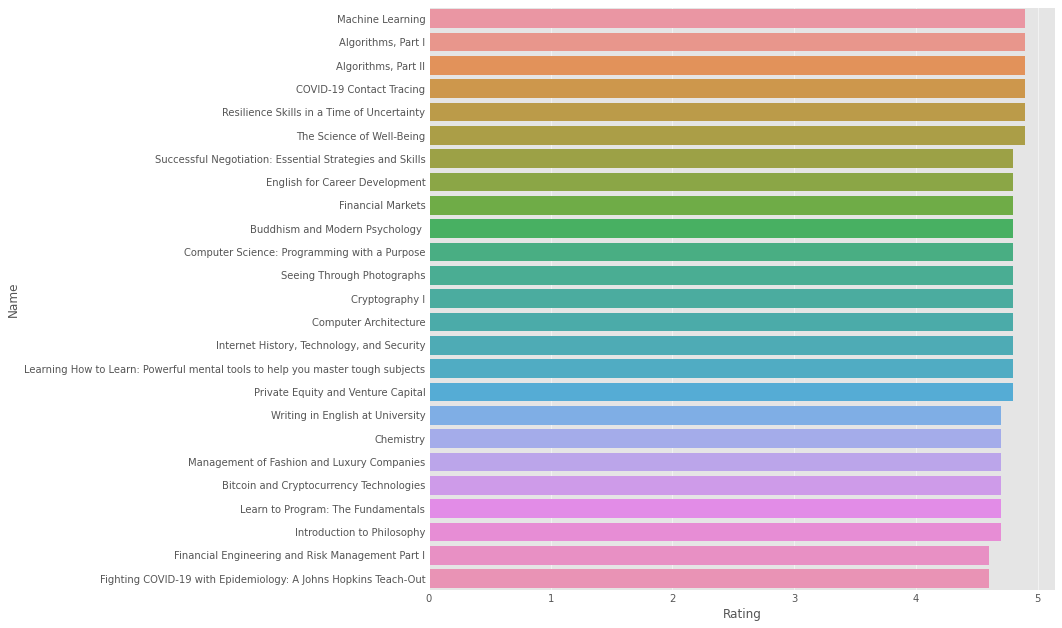

In [168]:
#Rank the courses by their rating
fig= plt.figure(figsize=(10,10))
course_df['Rating'] = course_df['Rating'].astype(float)
course_df.sort_values(by=['Rating'], inplace=True, ascending = False)
sns.barplot(x='Rating' , y='Name', data=course_df)
plt.show()

This was a comprehensive tutorial on how to use basic skills to scrape data from a webpage.